In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Bài 1:

In [35]:
def get_column(data, index) :
    result = []
    for line in data:
        pos = -1
        for i in line:
            pos += 1
            if pos == index:
                result.append(i)
    return result

In [33]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data , radio_data , newspaper_data]
    y = sales_data
    return X, y

In [34]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [36]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):

    result = w1*x1 + w2*x2 + w3*x3 +b

    return result

def compute_loss_mse(y_hat, y):

    result = pow((y_hat-y), 2)

    return result

In [6]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):

    dl_dwi = 2*xi*(y_hat - y)

    return dl_dwi

def compute_gradient_b(y, y_hat):

    dl_db = 2*(y_hat - y)

    return dl_db

In [7]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):

    wi = wi - (lr * dl_dwi)
    
    return wi

def update_weight_b(b, dl_db, lr):

    b = b - (lr * dl_db)

    return b

In [8]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y  = y_data[i]

            # print(y)
            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db  = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
            
    return (w1,w2,w3,b, losses)

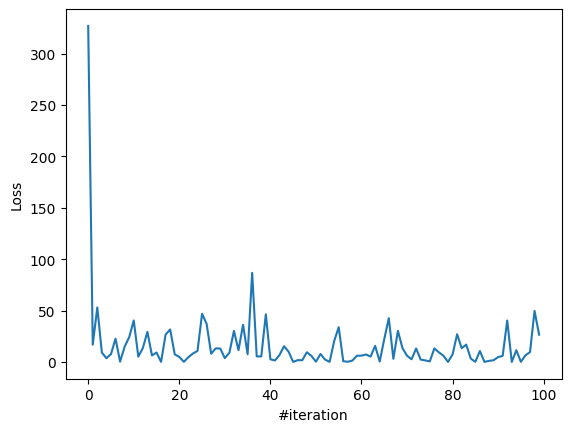

In [9]:
X, y = prepare_data('./advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [10]:
#Multiple choices:
#Question 1:
X, y = prepare_data('./advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

#Multiple choices:
#Question 2:
y_p = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

#Multiple choices:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

#Multiple choices:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

#Multiple choices:
#Question 9:
#given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

[624.1, 175.10000000000002, 300.5, 78.9]
1.0
0.25
-1.0
-3.0
1.000005
0.50001
0.07405984066396477 0.15917360263437663 0.017561197559948935
predicted sales is 8.176413319549823


In [14]:
def compute_loss_mae(y_hat, y):
    # Calculate the absolute differences between the true and predicted values
    absolute_errors = np.abs(y_hat - y)
    
    # Calculate the mean of the absolute errors
    mae_loss = np.mean(absolute_errors)
    
    return mae_loss

In [15]:
#Multiple choices :
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


# Bài 2:

In [37]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
  
    for epoch in range(epoch_max):
        
        # Initialize accumulators for loss and gradients
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        # Process each sample
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # Compute loss (using MSE)
            loss = compute_loss_mse(y, y_hat)
            
            # Accumulate loss
            loss_total += loss
            
            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        
        # After processing N samples, update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        
        # Log average loss for the epoch
        losses.append(loss_total / N)
    
    return w1, w2, w3, b, losses

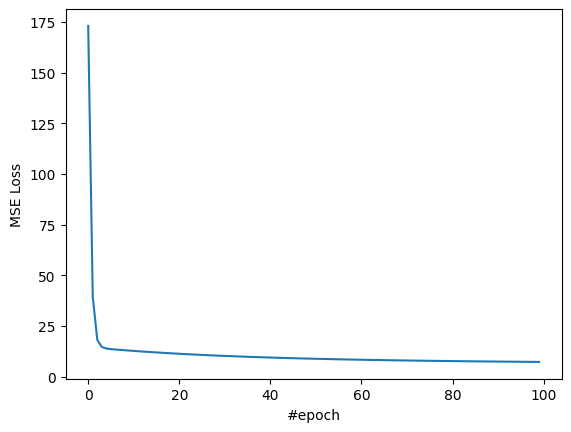

In [17]:
X, y = prepare_data('./advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X, y,
                                                            epoch_max=1000,
                                                            lr=1e-5)
plt.plot(losses[:100])
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [38]:
X, y = prepare_data('./advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Bài 3:

In [25]:
def prepare_data(file_name_dataset):
    # Đọc dữ liệu từ file CSV và bỏ qua dòng tiêu đề
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Lấy dữ liệu từ các cột: TV, Radio, Newspapers, Sales
    tv_data = get_column(data, 0)  # Cột TV
    radio_data = get_column(data, 1)  # Cột Radio
    newspaper_data = get_column(data, 2)  # Cột Newspapers
    sales_data = get_column(data, 3)  # Cột Sales (là y)

    # Tạo danh sách đặc trưng (features) với x0 = 1
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    
    # y là dữ liệu của Sales
    y = sales_data
    
    return X, y

# Hàm trợ giúp để lấy một cột từ dữ liệu
def get_column(data, index):
    return [row[index] for row in data]

In [26]:
def initialize_params():
    # Khởi tạo trọng số ngẫu nhiên
    bias = 0  # Bias bắt đầu từ 0
    w1 = random.gauss(mu=0.0, sigma=0.01)  # Trọng số w1 cho TV
    w2 = random.gauss(mu=0.0, sigma=0.01)  # Trọng số w2 cho Radio
    w3 = random.gauss(mu=0.0, sigma=0.01)  # Trọng số w3 cho Newspapers

    # Trả về các trọng số
    return [bias, w1, w2, w3]

# Ví dụ khởi tạo, nếu cần kiểm tra lại giá trị trả về:
params = initialize_params()
print("Initialized parameters:", params)

Initialized parameters: [0, 0.01015426537563343, 0.0013831564794930715, -0.019782624789372195]


In [18]:
def predict(X_features, weights):
    # y_hat = x0*bias + x1*w1 + x2*w2 + x3*w3
    result = X_features[0] * weights[0] + X_features[1] * weights[1] + X_features[2] * weights[2] + X_features[3] * weights[3]
    return result

In [19]:
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

In [20]:
def compute_gradient_w(X_features, y, y_hat):
    # Gradient calculation for each weight: dl/dw = 2 * (y_hat - y) * xi
    dl_dweights = [2 * (y_hat - y) * X_features[i] for i in range(len(X_features))]
    return dl_dweights

In [21]:
def update_weight(weights, dl_dweights, lr):
    # Update each weight: wi = wi - lr * dl/dwi
    updated_weights = [weights[i] - lr * dl_dweights[i] for i in range(len(weights))]
    return updated_weights

In [27]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()  # Khởi tạo trọng số ban đầu
    N = len(y_output)  # Số lượng mẫu dữ liệu

    for epoch in range(epoch_max):
        print("Epoch", epoch)
        for i in range(N):
            # Lấy một mẫu dữ liệu - dòng thứ i
            features_i = X_feature[i]
            y = y_output[i]

            # Tính toán y_hat (giá trị dự đoán)
            y_hat = predict(features_i, weights)

            # Tính toán loss
            loss = compute_loss(y_hat, y)

            # Tính toán gradient cho các trọng số
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật trọng số
            weights = update_weight(weights, dl_dweights, lr)

            # Lưu lại giá trị loss
            losses.append(loss)
    
    return weights, losses

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


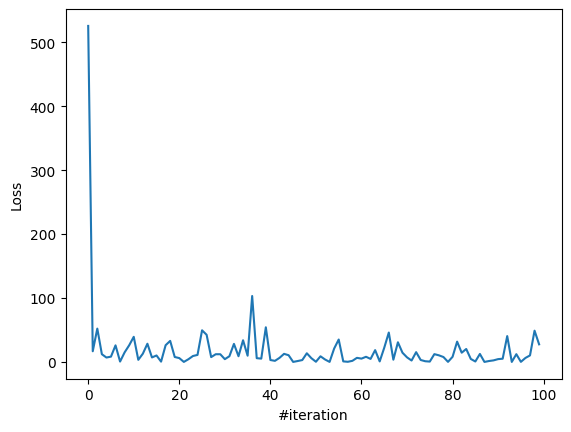

In [28]:
# Chuẩn bị dữ liệu từ file advertising.csv
X, y = prepare_data('advertising.csv')

# Huấn luyện mô hình và lấy trọng số và giá trị loss
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Hiển thị kết quả
plt.plot(L[0:100])  # Hiển thị 100 lần lặp đầu tiên
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()


In [29]:
print(L[9999])  # In giá trị loss tại lần lặp thứ 9999

31.335941262805196
